**Fachprojekt Dokumentenanalyse** *WS 22/23* -- *Philipp Oberdiek, Gernot A. Fink* -- *Technische Universität Dortmund, Lehrstuhl XII, Mustererkennung in eingebetteten Systemen*
---
# Aufgabe 1: Brown Corpus

In der ersten Aufgabe sollen Sie sich mit dem Brown Corpus vertraut machen.
 - Laden Sie den Corpus und schauen Sie sich dessen Aufbau an.
 - Analysieren Sie den Corpus in dem Sie Wortstatistiken bestimmen.
 - Verbessern Sie die Aussagekraft der Statistiken.

## Laden des Corpus
Für das Fachprojekt benötigen Sie die NLTK (http://www.nltk.org/) Datensätze "brown" und "stopwords". Falls diese noch nicht lokal auf Ihrem Rechner verfügbar sein sollten, können Sie sie über den "NLTK Downloader" herunterladen. Ein entsprechender Dialog öffnet sich in diesem Fall automatisch.


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import sys

if ".." not in sys.path:
    sys.path.append("..")
    
from common.corpus import CorpusLoader

CorpusLoader.load()

Im Folgenden werden einige grundlegende Statistiken des Brown Corpus ausgegeben, die vor allem etwas über dessen Struktur / Aufbau aussagen.

Siehe auch: http://en.wikipedia.org/wiki/Brown_Corpus

Der Corpus enthält verschiedene Kategorien, in die Dokumente einsortiert sind. Ein Dokument besteht aus Wörtern. Als nächstes sehen Sie, wie Sie auf Kategorien, Dokumente und Wörter zugreifen können.

In [2]:
brown = CorpusLoader.brown_corpus()
brown_categories = brown.categories()
brown_documents = brown.fileids()
brown_words = brown.words()

Geben Sie nun die Gesamtanzahl von Kategorien, Dokumenten und Wörtern mit print aus.

In [3]:
print("Gesamtanzahl Kategorien:", len(brown_categories))
print("Gesamtanzahl Dokumenten:", len(brown_documents))
print("Gesamtanzahl Wörtern:", len(brown_words))

Gesamtanzahl Kategorien: 15
Gesamtanzahl Dokumenten: 500
Gesamtanzahl Wörtern: 1161192


Geben Sie die Namen der einzelnen Kategorien aus.

In [4]:
brown_categories

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Bisher haben Sie noch keine Information über die Struktur des Brown Corpus gewonnen, da sie jeweils die Gesamtzahl von Kategorien, Dokumenten und Wörtern ausgegeben haben.

Geben Sie als nächstes die Anzahl von Dokumenten und Wörtern je Kategorie aus.
http://www.nltk.org/howto/corpus.html#categorized-corpora

**Hilfreiche Funktionen:** `fileids`, `words`

Visualisieren Sie die Verteilungen mit Hilfe von horizontalen bar plots. Nutzen Sie dafür die Funktion `hbar_plot` aus dem Modul `common.visualization`.
http://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html

Optional: Plotten Sie die Verteilungen mit vertikalen bar plots.
Vermeiden Sie, dass sich die an der x-Achse aufgetragenen labels überlappen
http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xticklabels
Stellen Sie nun die Verteilungen über Dokumente und Wörter in einem gemeinsamen Plot dar. Verwenden Sie unterschiedliche Farben.
http://matplotlib.org/examples/api/barchart_demo.html

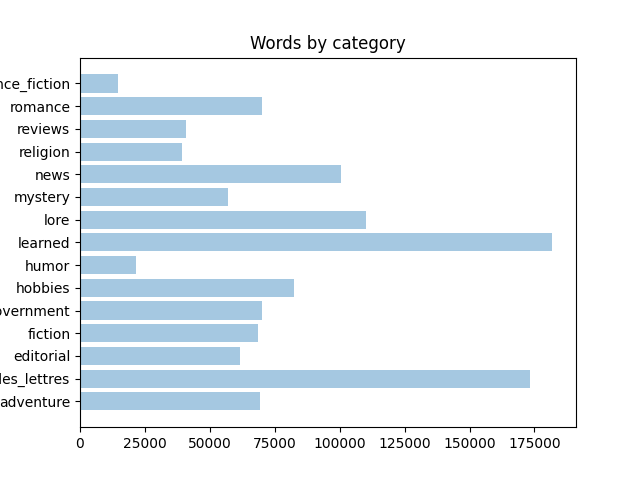

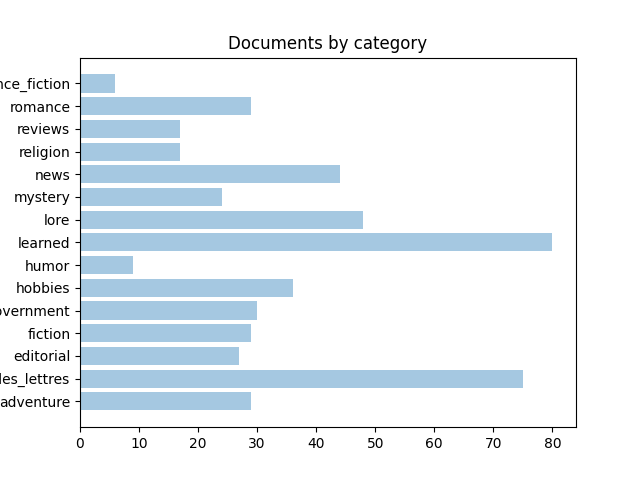

In [5]:
from common.visualization import hbar_plot

words_by_cat = []
documents_by_cat = []

for cat in brown_categories:
    words_by_cat.append(len(brown.words(categories=cat)))
    documents_by_cat.append(len(brown.fileids(categories=cat)))


hbar_plot(words_by_cat, brown_categories, title="Words by category")
hbar_plot(documents_by_cat, brown_categories, title="Documents by category")

Die nun zu implementierenden Funktionen spielen eine zentrale Rolle im weiteren Verlauf des Fachprojekts. Achten Sie auf eine effiziente und 'saubere' Umsetzung. Verwenden Sie geeignete Datenstrukturen und passende Python Funktionen. Wenn Ihnen Ihr Ansatz sehr aufwändig vorkommt, haben Sie vermutlich nicht die passenden Datenstrukturen / Algorithmen / (highlevel) Python / NumPy Funktionen verwendet. Fragen Sie in diesem Fall!

Schauen Sie sich jetzt schon gründlich die Klassen und deren Interfaces in den mitgelieferten Modulen an. Wenn Sie Ihre Datenstrukturen von Anfang an dazu passend wählen, erleichtert dies deren spätere Benutzung. Zusätzlich bieten diese Klassen bereits etwas Inspiration für Python-typisches Design, wie zum Beispiel Duck-Typing.

Zu einigen der vorgebenen Interfaces finden Sie Unit Tests in dem Paket 'utest'. Diese sind sehr hilfreich um zu überprüfen, ob ihre Implementierung zusammen mit anderen mitgelieferten Implementierungen / Interfaces funktionieren wird. Stellen Sie immer sicher, dass die Unit tests für die von Ihnen verwendeten Funktionen erfolgreich sind.  
**Hinweis:** Im Verlauf des Fachprojekts werden die Unit Tests nach und nach erfolgreich sein. Falls es sie zu Beginn stört, wenn einzelne Unit Tests fehlschlagen können Sie diese durch einen 'decorator' vor der Methodendefinition vorübergehend abschalten: `@unittest.skip('')`
https://docs.python.org/3/library/unittest.html#skipping-tests-and-expected-failures
Denken Sie aber daran sie später wieder zu aktivieren.

Wenn etwas unklar ist, fragen Sie!

Um Texte / Dokumente semantisch zu analysieren, betrachtet man Verteilungen über Wortvorkommen. Ziel dieser semantischen Analyse soll es letztlich sein unbekannte Dokumente automatisch einer bekannten Kategorie / Klasse zuzuordnen.

Bestimmen Sie die 20 häufigsten Wörter des Brown Corpus (insgesamt), sowie die 20 häufigsten Wörter je Kategorie.

http://docs.python.org/3/library/collections.html#collections.defaultdict
http://docs.python.org/3/library/functions.html#sorted

**Hinweis:** Die Dokumentation zu `defaultdict` enthält ein sehr hilfreiches Beispiel.

Implementieren Sie die (statische) Funktion `BagOfWords.most_freq_words` im Modul `common.features`. Nutzen Sie die Funktion anschließend um die 20 häufigstens Wörter des Corpus und pro Kategorie auszugeben.

In [6]:
from common.features import BagOfWords

print('\nTOP 20 words for the full corpus')
top_words = BagOfWords.most_freq_words(word_list=brown_words, n_words=20)
print(' | '.join(top_words))
# TOP 10 words per category

print("\nTop 10 words for each category")
for cat in brown_categories:
    print(f"{cat}:", ' | '.join(BagOfWords.most_freq_words(word_list=brown.words(categories=cat), n_words=10)))


TOP 20 words for the full corpus
the | , | . | of | and | to | a | in | that | is | was | for | `` | '' | The | with | it | as | he | his

Top 10 words for each category
adventure: . | , | the | and | a | of | to | `` | '' | was
belles_lettres: the | , | . | of | and | to | a | in | that | is
editorial: the | , | . | of | to | and | a | in | is | that
fiction: , | . | the | and | to | of | a | was | in | he
government: the | , | of | . | and | to | in | a | for | is
hobbies: the | , | . | of | and | to | a | in | is | for
humor: , | the | . | of | and | a | to | `` | '' | in
learned: the | , | of | . | and | to | in | a | is | that
lore: the | , | . | of | and | to | a | in | is | that
mystery: . | , | the | to | and | a | of | was | `` | ''
news: the | , | . | of | and | to | a | in | for | The
religion: the | , | of | . | and | to | in | a | is | that
reviews: , | the | . | of | and | a | to | in | is | ``
romance: , | . | the | and | to | a | of | `` | '' | was
science_fiction: , |

Testen Sie ihre Implementierung mit folgendem Unittest:

In [7]:
import unittest

from utest.test_features import BagOfWordsTest

suite = unittest.TestSuite()
suite.addTest(BagOfWordsTest("test_most_freq_words"))
runner = unittest.TextTestRunner()
runner.run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

Diese Wörter sind nicht besonders charakteristisch für die Unterscheidung verschiedener Kategorien. Daher entfernt man solche wenig aussagekräftigen Wörter vor einer semantischen Analyse. Man bezeichnet diese Wörter als *stopwords*.

Eine Liste mit stopwords wird durch NLTK bereitgestellt (siehe oben, sowie im `common.corpus` Modul). Filtern Sie nun alle stopwords bevor Sie die 20 häufigsten Wörter im Brown Corpus (insgesamt und je Kategorie) erneut bestimmen. Achten Sie dabei auf Gross- und Kleinschreibung und filtern Sie auch Satzzeichen (`string.punctuation`).

http://www.nltk.org/howto/corpus.html#word-lists-and-lexicons
http://docs.python.org/3/library/string.html

Geben Sie zunächst stopwords und Satzzeichen auf der Kommandozeile aus.

In [8]:
import string

print("Stopwords:", CorpusLoader.stopwords_corpus())
print("\nSatzzeichen:", string.punctuation)

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

Mit der Liste von stopwords können Sie noch keine grammatikalischen Varianten von Wörtern erfassen, die ebenfalls nicht entscheidend für die semantische Analyse von Texten sind (zum Beispiel: walking, walked).

Verwenden Sie daher den `PorterStemmer` um Wörter auf ihre Wortstämme abzubilden.
Geben Sie die 20 häufigsten Wörter nach jedem Filter Schritt aus:

1. stopwords und Satzzeichen
2. Abbildung auf Wortstämme (stemming)

Erläutern Sie Ihre Beobachtungen.

Implementieren Sie die Methode `WordListNormalizer.normalize_words` im `common.features` Modul.

**Hilfreiche Funktionen:** http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter


In [9]:
from nltk.stem import PorterStemmer
from common.features import WordListNormalizer

word_list_normalizer = WordListNormalizer()


print("\nTop 10 words for each category")
for cat in brown_categories:
    word_list_filtered, word_list_stemmed = word_list_normalizer.normalize_words(brown.words(categories=cat))
    print(f"{cat}:", ' | '.join(BagOfWords.most_freq_words(word_list=word_list_stemmed, n_words=10)))


Top 10 words for each category
adventure: said | would | one | back | man | could | like | time | look | go
belles_lettres: one | would | time | new | even | man | may | like | could | year
editorial: would | one | state | new | year | mr. | time | american | unit | nation
fiction: would | said | one | could | like | look | time | go | man | get
government: state | year | develop | may | unit | use | govern | new | servic | time
hobbies: one | use | time | new | work | may | make | year | first | mani
humor: said | one | would | time | even | thing | like | mr. | could | seem
learned: af | one | use | may | would | state | system | time | two | first
lore: one | time | use | would | may | new | first | year | peopl | could
mystery: said | would | one | back | go | like | could | get | look | man
news: said | mrs. | would | year | new | one | state | last | two | mr.
religion: god | church | one | new | world | may | christian | spirit | would | man
reviews: one | music | mr. | new | f

Testen Sie ihre Implementierung mit folgendem Unittest:

In [10]:
import unittest

from utest.test_features import WordListNormalizerTest

suite = unittest.TestSuite()
suite.addTest(WordListNormalizerTest("test_normalize_words"))
runner = unittest.TextTestRunner()
runner.run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>